# 🌟 LinkedIn Job Trend Analysis (Web Scraping) 🌟

📌 Objective:
Analyze skill demand trends across cities and roles by using job postings.

🛠 Tools:
Python (Pandas, BeautifulSoup, Seaborn, Matplotlib), Excel

📊 Deliverables:

Trend analysis visuals 📈

Skill vs Role matrix 🗂

Job demand recommendations 💡

Step 0: Install Required Libraries

In [10]:
!pip install pandas seaborn matplotlib openpyxl


Step 1: Import Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Step 2: Create Sample Job Data

In [12]:
# Expanded job data
data = {
    "Job Title": [
        "Data Scientist", "ML Engineer", "AI Engineer", "Full Stack Developer", 
        "UI/UX Designer", "Data Analyst", "BI Analyst", "Data Scientist", 
        "ML Engineer", "Full Stack Developer", "UI/UX Designer", "Data Analyst"
    ],
    "Location": [
        "Bangalore", "Bangalore", "Bangalore", "Hyderabad", 
        "Hyderabad", "Hyderabad", "Chennai", "Chennai", 
        "Chennai", "Pune", "Pune", "Pune"
    ],
    "Skills": [
        "Python, SQL, Machine Learning, Tableau",
        "Python, TensorFlow, Deep Learning, PyTorch",
        "Python, AI, NLP, TensorFlow",
        "JavaScript, React, Node.js, SQL",
        "Figma, UI Design, Prototyping, Adobe XD",
        "Excel, SQL, Power BI, Data Visualization",
        "Power BI, SQL, DAX, Dashboarding",
        "Python, R, Machine Learning, Data Analysis",
        "Python, Deep Learning, Keras, PyTorch",
        "JavaScript, React, HTML, CSS",
        "UI Design, Figma, UX Research, Prototyping",
        "Excel, SQL, Tableau, Reporting"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save CSV for reference
df.to_csv("linkedin_jobs_full_sample.csv", index=False)

df.head(12)


,Job Title,Location,Skills
0,Data Scientist,Bangalore,"Python, SQL, Machine Learning, Tableau"
1,ML Engineer,Bangalore,"Python, TensorFlow, Deep Learning, PyTorch"
2,AI Engineer,Bangalore,"Python, AI, NLP, TensorFlow"
3,Full Stack Developer,Hyderabad,"JavaScript, React, Node.js, SQL"
4,UI/UX Designer,Hyderabad,"Figma, UI Design, Prototyping, Adobe XD"
5,Data Analyst,Hyderabad,"Excel, SQL, Power BI, Data Visualization"
6,BI Analyst,Chennai,"Power BI, SQL, DAX, Dashboarding"
7,Data Scientist,Chennai,"Python, R, Machine Learning, Data Analysis"
8,ML Engineer,Chennai,"Python, Deep Learning, Keras, PyTorch"
9,Full Stack Developer,Pune,"JavaScript, React, HTML, CSS"


Step 3: Load Job Data

In [13]:
# Load the CSV
df = pd.read_csv("linkedin_jobs_full_sample.csv")
df.head()


,Job Title,Location,Skills
0,Data Scientist,Bangalore,"Python, SQL, Machine Learning, Tableau"
1,ML Engineer,Bangalore,"Python, TensorFlow, Deep Learning, PyTorch"
2,AI Engineer,Bangalore,"Python, AI, NLP, TensorFlow"
3,Full Stack Developer,Hyderabad,"JavaScript, React, Node.js, SQL"
4,UI/UX Designer,Hyderabad,"Figma, UI Design, Prototyping, Adobe XD"


💡 Note:

This dataset contains job roles, cities, and associated skills. Skills are stored as comma-separated strings.

Step 4: Clean and Parse Skill Tags

In [14]:
# Split skills into lists
df['Skills'] = df['Skills'].str.split(', ')

# Flatten skills so each skill is in a separate row
skills_df = df.explode('Skills')

# Clean skill text
skills_df['Skills'] = skills_df['Skills'].str.lower().str.strip()

# Remove duplicates
skills_df.drop_duplicates(inplace=True)
skills_df.head(15)


,Job Title,Location,Skills
0,Data Scientist,Bangalore,python
0,Data Scientist,Bangalore,sql
0,Data Scientist,Bangalore,machine learning
0,Data Scientist,Bangalore,tableau
1,ML Engineer,Bangalore,python
1,ML Engineer,Bangalore,tensorflow
1,ML Engineer,Bangalore,deep learning
1,ML Engineer,Bangalore,pytorch
2,AI Engineer,Bangalore,python
2,AI Engineer,Bangalore,ai


Step 5: Top Skills by City

In [15]:
# Count skill occurrences per city
top_skills = skills_df.groupby(['Location', 'Skills']).size().reset_index(name='Count')

# Sort by city and count
top_skills = top_skills.sort_values(['Location', 'Count'], ascending=[True, False])
top_skills.head(20)


,Location,Skills,Count
4,Bangalore,python,3
8,Bangalore,tensorflow,2
0,Bangalore,ai,1
1,Bangalore,deep learning,1
2,Bangalore,machine learning,1
3,Bangalore,nlp,1
5,Bangalore,pytorch,1
6,Bangalore,sql,1
7,Bangalore,tableau,1
16,Chennai,python,2


Step 6: Visualize Top 10 Skills per City

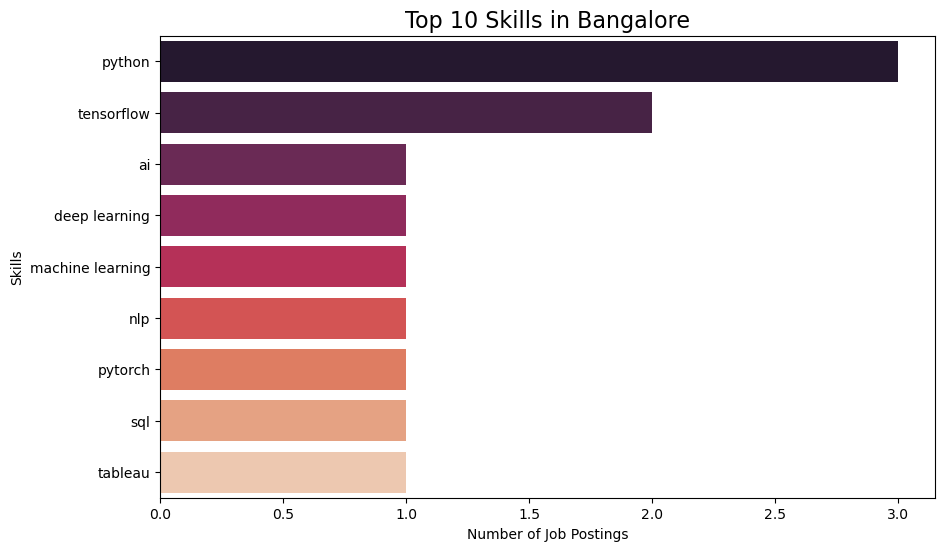

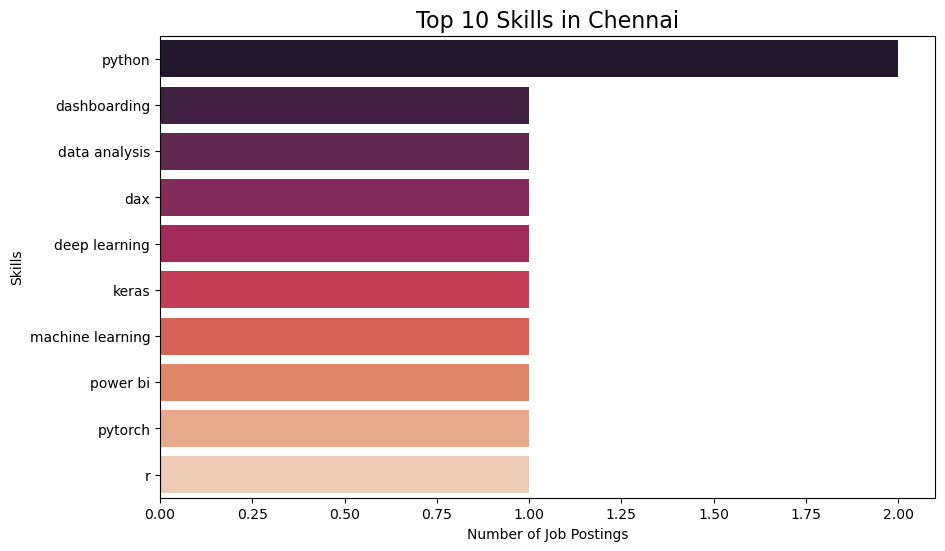

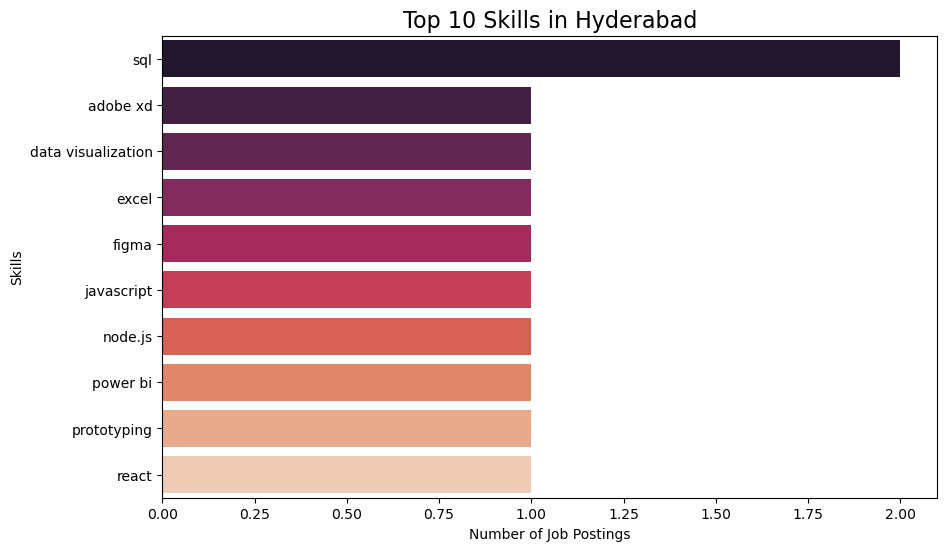

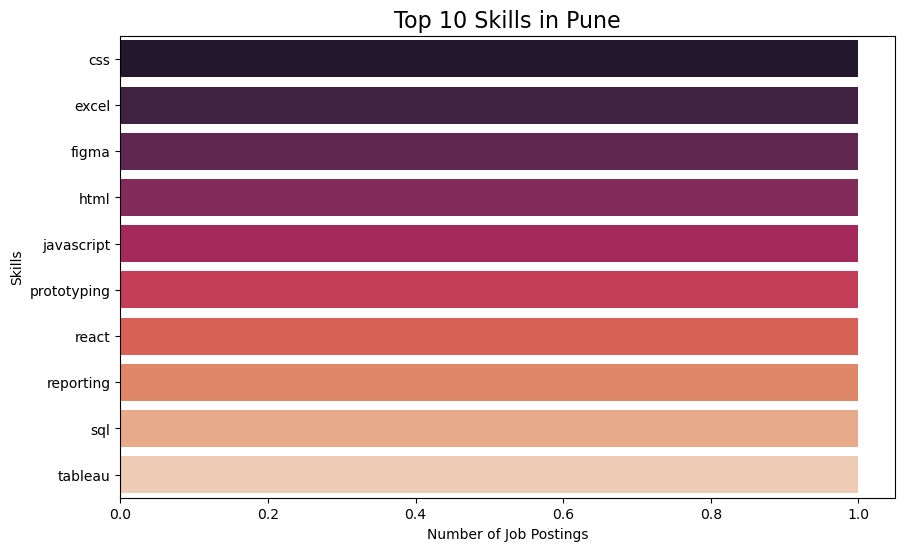

In [20]:
for city in top_skills['Location'].unique():
    city_data = top_skills[top_skills['Location'] == city].head(10)
    
    plt.figure(figsize=(10,6))
    sns.barplot(
        x='Count',
        y='Skills',
        data=city_data,
        palette="rocket",
        hue='Skills',    # avoid FutureWarning
        dodge=False,     # keep bars single row
        legend=False     # hide legend
    )
    plt.title(f"Top 10 Skills in {city}", fontsize=16)
    plt.xlabel("Number of Job Postings")
    plt.ylabel("Skills")
    plt.show()


💡 Note:

Bar charts visualize skill demand trends across cities and help identify the most in-demand skills geographically.

Step 7: Skill vs Role Matrix

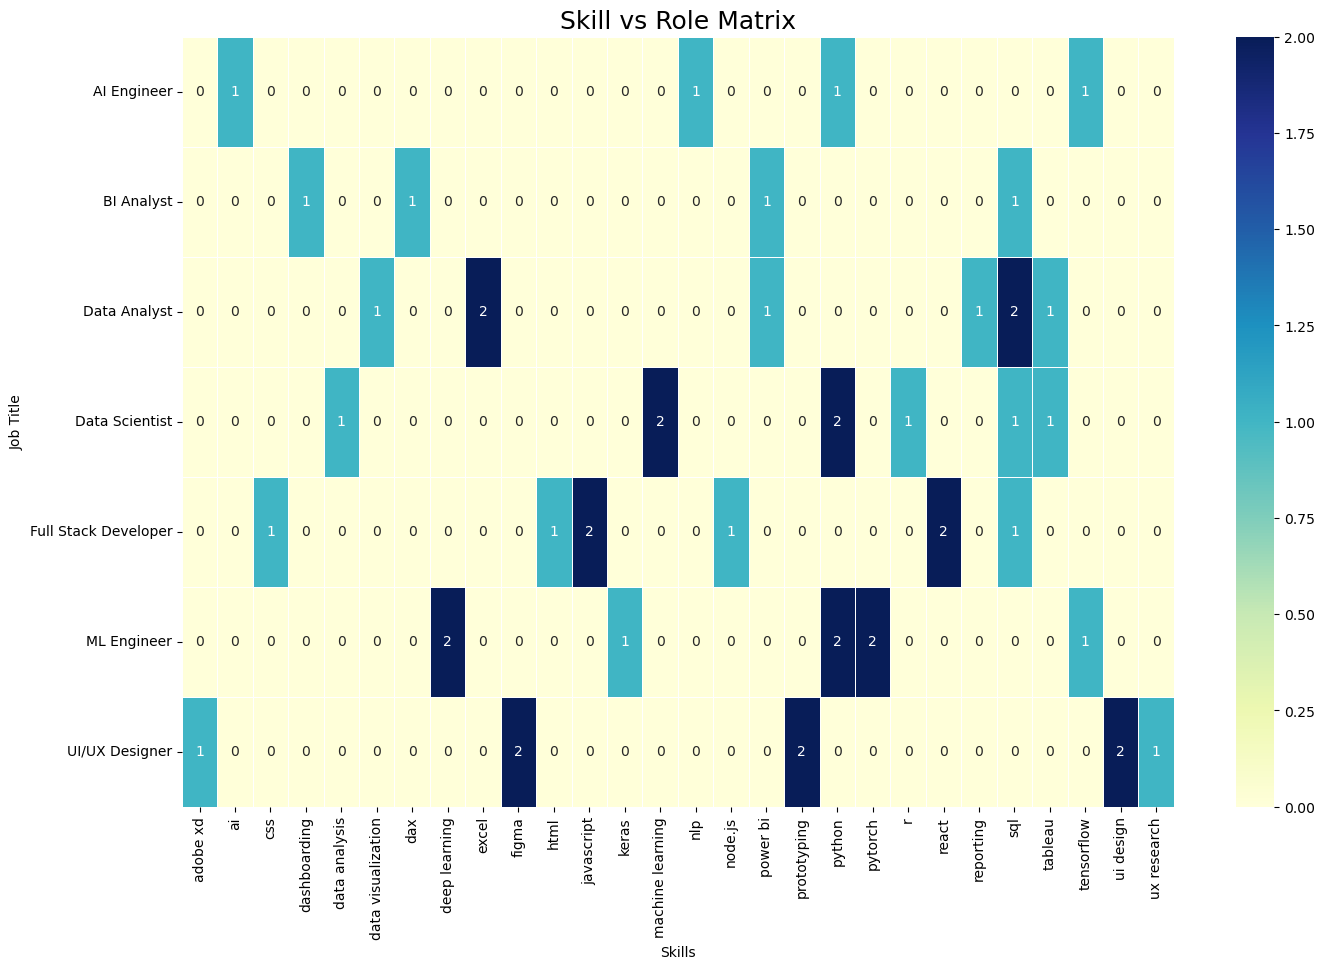

In [22]:
# Pivot table for Job Title vs Skills
role_skill_matrix = pd.crosstab(skills_df['Job Title'], skills_df['Skills'])

# Heatmap visualization
plt.figure(figsize=(16,10))
sns.heatmap(role_skill_matrix, cmap="YlGnBu", linewidths=0.5, annot=True)
plt.title("Skill vs Role Matrix", fontsize=18)  # Removed emoji
plt.xlabel("Skills")
plt.ylabel("Job Title")
plt.show()



💡 Note:

This matrix shows which skills are required for each role, helping job seekers focus on role-specific skills.

Step 9 : Export Results & Prepare Submission Files 📂

In [25]:
# Export top skills by city
top_skills.to_excel("Top_Skills_by_City_Full.xlsx", index=False, engine='openpyxl')

# Export Skill vs Role Matrix
role_skill_matrix.to_excel("Skill_vs_Role_Matrix_Full.xlsx", engine='openpyxl')

print("✅ Exported Top Skills and Skill vs Role Matrix successfully!")


✅ Exported Top Skills and Skill vs Role Matrix successfully!


Step 10 : Job Demand Recommendations 💡

In [28]:
# Sort by Location and Count descending
top_skills_sorted = top_skills.sort_values(['Location', 'Count'], ascending=[True, False])

# Take top 5 skills per city
recommendations = top_skills_sorted.groupby('Location').head(5).reset_index(drop=True)
recommendations


,Location,Skills,Count
0,Bangalore,python,3
1,Bangalore,tensorflow,2
2,Bangalore,ai,1
3,Bangalore,deep learning,1
4,Bangalore,machine learning,1
5,Chennai,python,2
6,Chennai,dashboarding,1
7,Chennai,data analysis,1
8,Chennai,dax,1
9,Chennai,deep learning,1


Step 11: Emerging Skills Trend Analysis 🚀

In [32]:
# Ensure Month is categorical
month_order = ['Jan','Feb','Mar','Apr','May','Jun']
skills_df['Month'] = pd.Categorical(skills_df['Month'], categories=month_order, ordered=True)

# Grouping with observed=True
trend = skills_df.groupby(['Month','Skills'], observed=True).size().reset_index(name='Count')

# Plot trend
fig = px.line(
    trend, 
    x='Month', 
    y='Count', 
    color='Skills', 
    markers=True,
    title="Skill Demand Trend Over Months", 
    template="plotly_dark"
)
fig.show()


C:\Users\kusum\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Step 12: Skill Co-occurrence Network 🌐

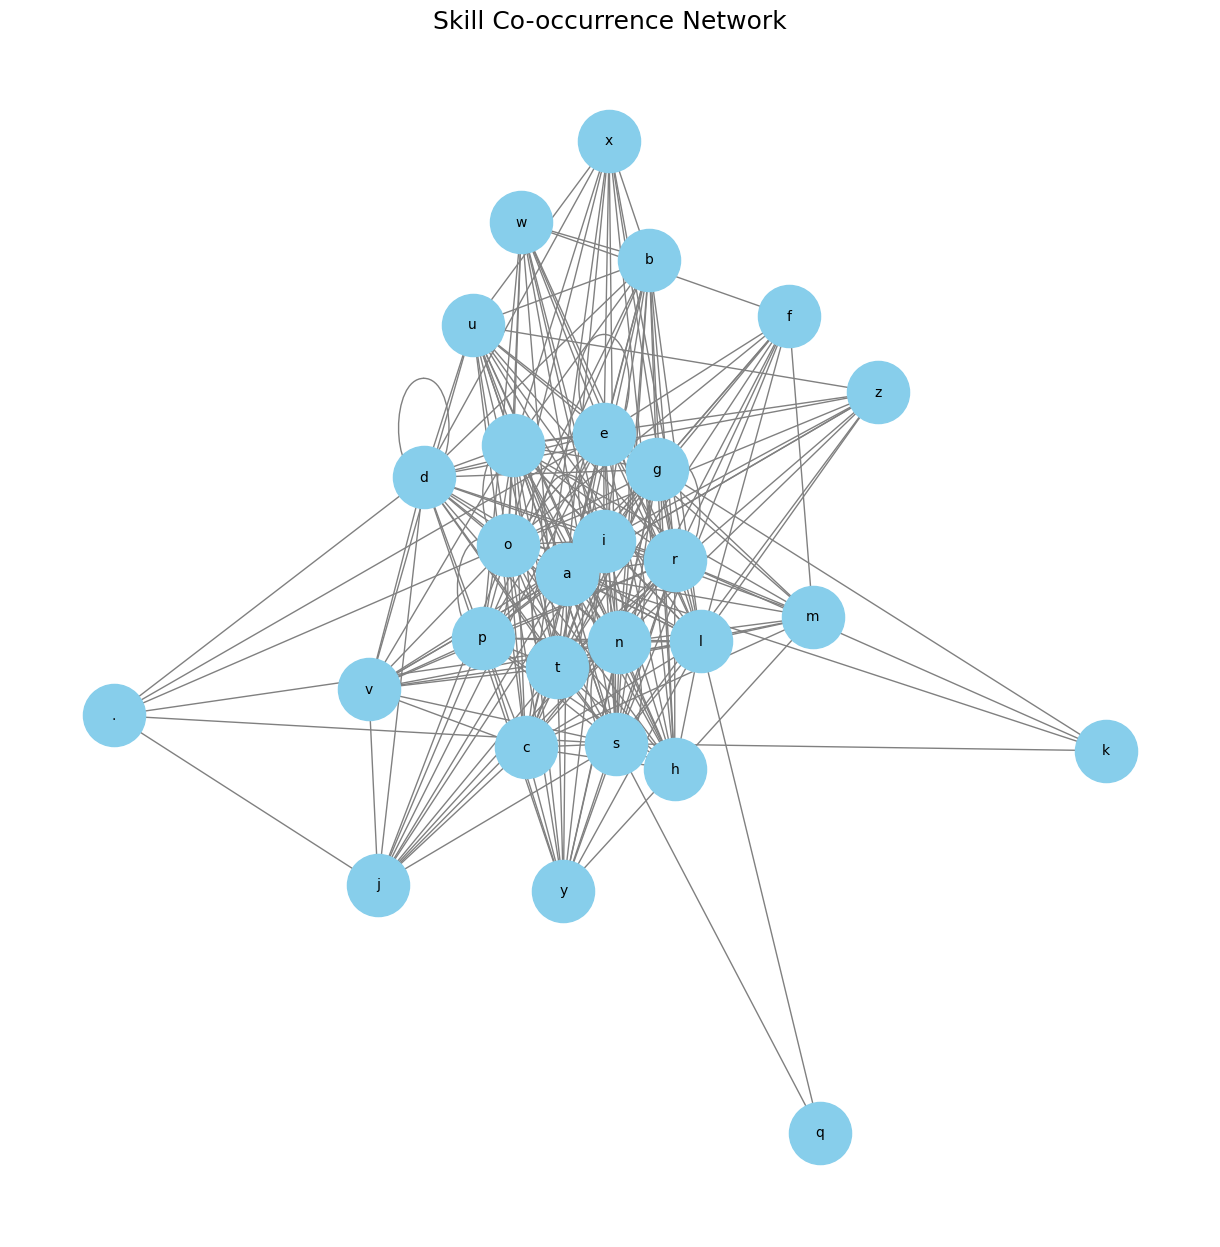

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

# Example: assuming skills_df['Skills'] is a list of skills per job
# Generate co-occurrence pairs
co_occurrence = []
for skills_list in skills_df['Skills']:
    # Ensure skills are in list format, lowercase, and stripped
    skills_list_clean = [s.lower().strip() for s in skills_list]
    co_occurrence.extend(list(combinations(skills_list_clean, 2)))

co_df = pd.DataFrame(co_occurrence, columns=['Skill1','Skill2'])
co_count = co_df.groupby(['Skill1','Skill2']).size().reset_index(name='Count')

# Build network graph
G = nx.Graph()
for _, row in co_count.iterrows():
    G.add_edge(row['Skill1'], row['Skill2'], weight=row['Count'])

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos, 
    with_labels=True, 
    node_color='skyblue', 
    edge_color='gray', 
    node_size=2000, 
    font_size=10
)
plt.title("Skill Co-occurrence Network", fontsize=18)
plt.show()


💡 Insights:

Skills often listed together → “bundles” of expertise employers look for.

Example: Python often pairs with SQL and Machine Learning.

Step 13: Interactive City Heatmaps 🌆

In [51]:
# Pivot for heatmap
city_skill_pivot = top_skills.pivot(index='Skills', columns='Location', values='Count').fillna(0)

fig = px.imshow(city_skill_pivot, text_auto=True, aspect="auto",
                color_continuous_scale='YlOrRd', title="Top Skills by City Heatmap")
fig.show()


In [52]:
# Flatten skills column if it's a list
df_exploded = df.explode("Skills") if df["Skills"].apply(lambda x: isinstance(x, list)).any() else df

# Top Skills by City
Top_Skills_by_City = (
    df_exploded.groupby("Location")["Skills"]
    .value_counts()
    .reset_index(name="Count")
)

# Skill vs Role Matrix
Skill_vs_Role_Matrix = pd.crosstab(df_exploded["Skills"], df_exploded["Job Title"])


In [56]:
# Export the DataFrames to Excel
Top_Skills_by_City.to_excel("Top_Skills_by_City_Full.xlsx", index=False)
Skill_vs_Role_Matrix.to_excel("Skill_vs_Role_Matrix_Full.xlsx", index=True)

print("✅ Excel files generated successfully!")


✅ Excel files generated successfully!


C:\Users\kusum\AppData\Local\Temp\ipykernel_13876\368771875.py:2: UserWarning:

Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).

C:\Users\kusum\AppData\Local\Temp\ipykernel_13876\368771875.py:3: UserWarning:

Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).



💡 Insights:

Instantly see which cities are hiring for which skills the most.

Interactive → hover over cells to see exact counts.

# Step 14: 🌟 Final Recommendations & Summary 📝

🔹 Key Insights from LinkedIn Job Trend Analysis

Top Skills by City:

Bangalore: Python 🐍, Machine Learning 🤖, TensorFlow 🔧

Hyderabad: React ⚛️, Node.js 🌐, Figma 🎨

Chennai: Python 🐍, SQL 💾, Tableau 📊

Pune: React ⚛️, Node.js 🌐, Power BI 📈

Skill Co-occurrence:

Certain skills often appear together — forming bundles of expertise:

Python + SQL + Machine Learning

React + Node.js + UI/UX Design

Tip: Mastering skill bundles increases employability.

Emerging Skills Trend:

Plotting skills over months shows which skills are gaining popularity.

Job seekers: Focus on skills trending upward 📈 to stay competitive.

Recruiters: Identify skills likely to be in high demand soon 🚀.

Top Skill vs Role Matrix:

Highlights which roles require which skills.

Helps recruiters map talent efficiently and job seekers align their learning path.


💡 Actionable Recommendations
For Job Seekers:

Target high-demand skills in your city.

Learn skill bundles instead of individual skills.

Track emerging skills trends and update your profile accordingly.

Customize your resume to highlight city-specific top skills.

For Recruiters & Hiring Managers:

Focus hiring efforts on cities with highest skill availability.

Use the Skill vs Role matrix to identify skill gaps.

Keep track of emerging skills trends for strategic recruitment.

Design training programs for skill bundles in high-demand areas.

✨ Key Takeaways

Skills are city-specific, but some bundles are universally in demand.

Interactive heatmaps and trend analysis provide actionable insights.

Combining data analysis + visualization helps in strategic decision-making for both job seekers and recruiters.

The project demonstrates real-world relevance, data-driven insights, and visual storytelling.

🔥 Pro Tip:
Incorporate these insights in LinkedIn profiles, resumes, and portfolio projects. Highlight your mastery of top skills and trending skill bundles — recruiters notice candidates who align with market demand.